<a href="https://colab.research.google.com/github/Alxn-z/Diplomado-Inteligencia-Artificial-PLN/blob/Aprendizaje-Supervisado/ejercicioregresionmultiple_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
carros=pd.read_csv('/content/FuelConsumptionCo2.csv')

In [6]:
carros.head()

MODELYEAR   MAKE       MODEL VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0       2014  ACURA         ILX      COMPACT         2.0          4   
1       2014  ACURA         ILX      COMPACT         2.4          4   
2       2014  ACURA  ILX HYBRID      COMPACT         1.5          4   
3       2014  ACURA     MDX 4WD  SUV - SMALL         3.5          6   
4       2014  ACURA     RDX AWD  SUV - SMALL         3.5          6   

  TRANSMISSION FUELTYPE  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY  \
0          AS5        Z                   9.9                  6.7   
1           M6        Z                  11.2                  7.7   
2          AV7        Z                   6.0                  5.8   
3          AS6        Z                  12.7                  9.1   
4          AS6        Z                  12.1                  8.7   

   FUELCONSUMPTION_COMB  FUELCONSUMPTION_COMB_MPG  CO2EMISSIONS  
0                   8.5                        33           196  
1                   9.6                        29           221  
2                   5.9                        48           136  
3                  11.1                        25           255  
4                  10.6                        27           244

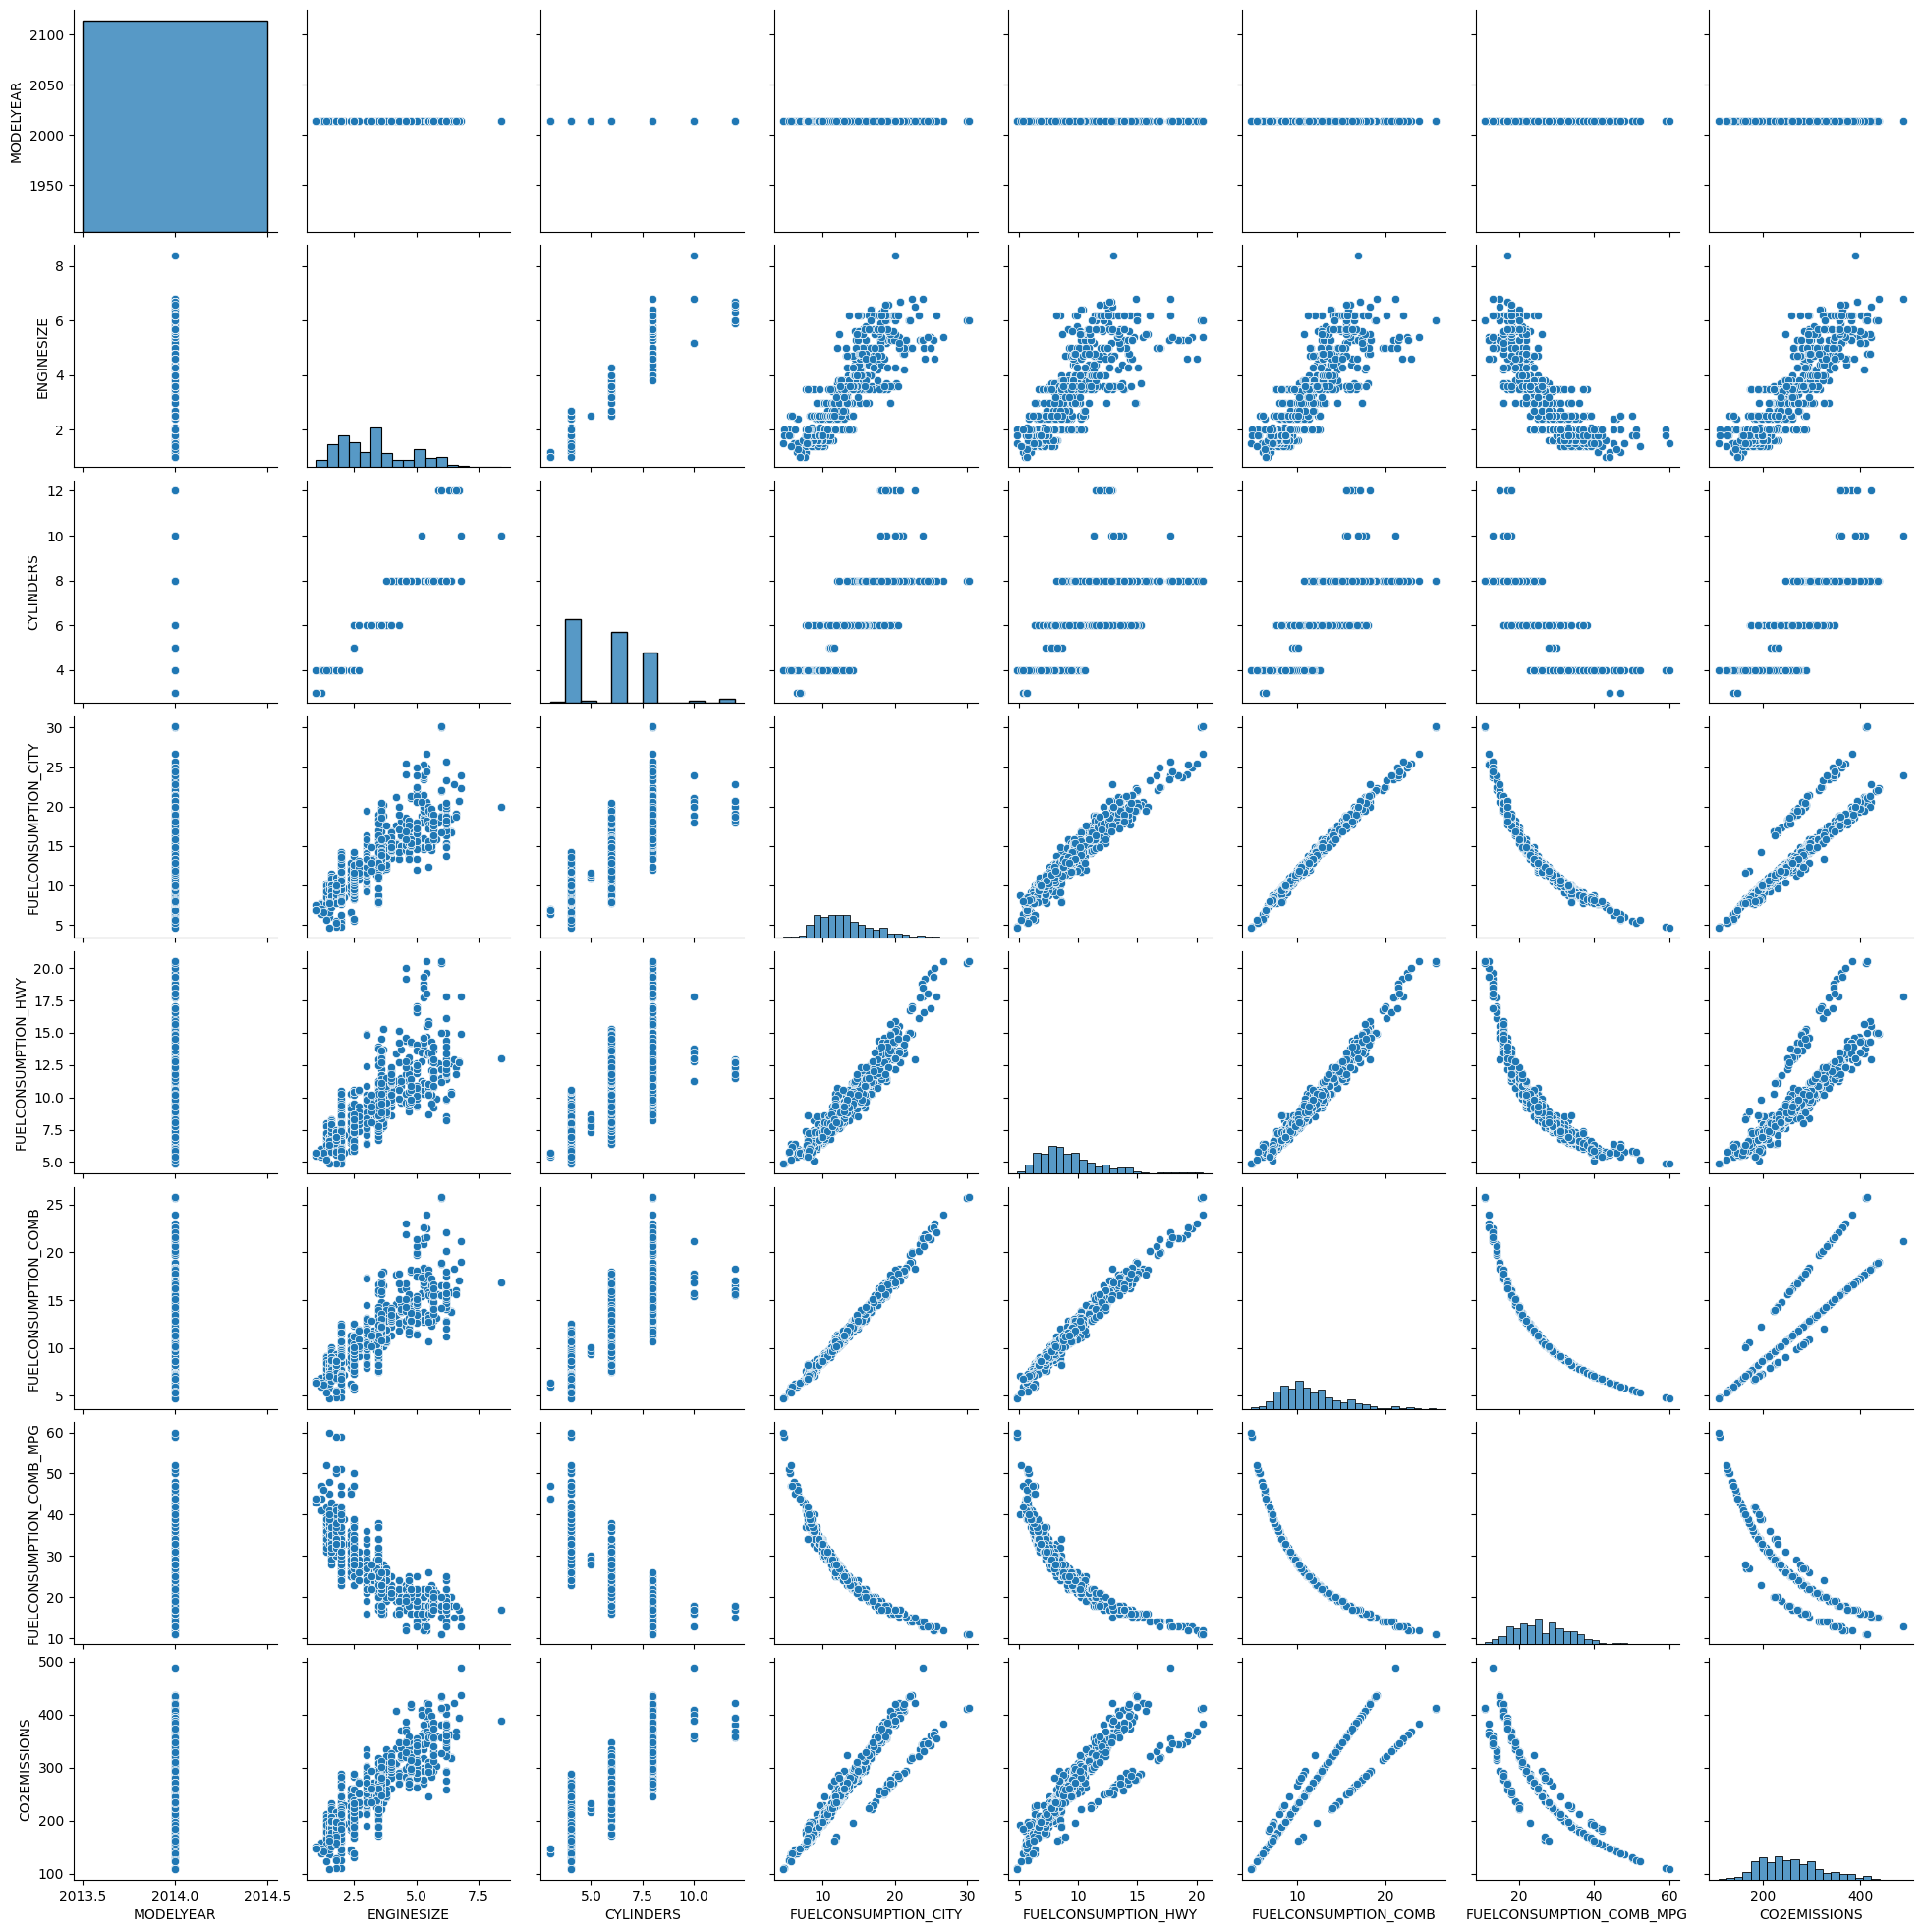

In [7]:
sns.pairplot(carros)

In [8]:
carrosS=carros[["MODELYEAR","ENGINESIZE","CYLINDERS","CO2EMISSIONS"]]

In [9]:
carrosS.sample(100)

MODELYEAR  ENGINESIZE  CYLINDERS  CO2EMISSIONS
194       2014         6.2          8           340
933       2014         2.5          4           207
228       2014         6.0          8           413
52        2014         4.2          8           306
851       2014         3.5          6           244
..         ...         ...        ...           ...
291       2014         3.6          6           276
171       2014         3.0          6           255
115       2014         3.0          6           212
325       2014         3.6          6           250
771       2014         5.5          8           292

[100 rows x 4 columns]

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [11]:
carrosSX=carrosS[["MODELYEAR","ENGINESIZE","CYLINDERS"]]
carrosSY=carrosS[["CO2EMISSIONS"]]

In [12]:
carrosSY.shape


(1067, 1)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression as linearRegression
from sklearn.metrics import r2_score


In [14]:
x_train,x_testT=train_test_split(carrosSX,test_size=0.2, random_state=42)
y_train,y_testT=train_test_split(carrosSY,test_size=0.2, random_state=42)

In [15]:
x_train.shape

(853, 3)

In [16]:
x_testT.shape

(214, 3)

In [17]:
modelo=linearRegression().fit(x_train,y_train)

In [18]:
print("coeficiente",modelo.coef_)

coeficiente [[ 0.         28.94394117  8.38047988]]


In [19]:
print("interseccion",modelo.intercept_)

interseccion [111.37994337]


In [20]:
ypredtest=modelo.predict(x_testT)

In [21]:
r2_score(y_testT,ypredtest)

0.7748904347438592

In [22]:
ypredtrain=modelo.predict(x_train)

In [23]:
r2_score(y_train,ypredtrain)

0.7717198195120696

In [24]:
co2=modelo.predict([[2014,2.0,4]])
print(co2)

[[202.78974524]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
